# Credit Card Fraud Detection
**Goal:** Build a baseline fraud classifier and explain the steps, features, metrics, and trade-offs.

**Unfinished! Still working on improving my model!**

In [37]:
# basic imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning imports
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# preprocessing imports
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [38]:
df_train = pd.read_parquet(
    "https://lab.cs307.org/fraud/data/fraud-train.parquet",
)
df_test = pd.read_parquet(
    "https://lab.cs307.org/fraud/data/fraud-test.parquet",
)

In [39]:
# create X and y for train
X_train = df_train.drop("Fraud", axis=1)
y_train = df_train["Fraud"]

# create X and y for test
X_test = df_test.drop("Fraud", axis=1)
y_test = df_test["Fraud"]

In [40]:
#preprocessing the data (just imputing)
numeric_vars = X_train.columns.to_list()
numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
)
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_vars),
)
numeric_vars

['PC01',
 'PC02',
 'PC03',
 'PC04',
 'PC05',
 'PC06',
 'PC07',
 'PC08',
 'PC09',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'Amount']

In [41]:
data = []
for i in range(1,12):
    dtreemod = make_pipeline(
        preprocessor,
        DecisionTreeClassifier(max_depth=i, random_state=42)
    )
    dtreemod.fit(X_train, y_train)
    y_pred = dtreemod.predict(X_test)
    depth = i
    ac_scores = (accuracy_score(y_test, y_pred))
    pr_scores = (precision_score(y_test, y_pred))
    recall_scores = (recall_score(y_test, y_pred))
    d = {'depth':depth, 'ac_scores':ac_scores, 'pr_scores':pr_scores, 'recall_scores':recall_scores}
    data.append(d)
dtree_res = pd.DataFrame(data)
dtree_res

,depth,ac_scores,pr_scores,recall_scores
0,1,0.997715,0.944444,0.645570
1,2,0.998379,0.901408,0.810127
2,3,0.998600,0.968750,0.784810
3,4,0.998673,0.955224,0.810127
4,5,0.998379,0.938462,0.772152
5,6,0.998305,0.951613,0.746835
6,7,0.998231,0.936508,0.746835
7,8,0.998526,0.983607,0.759494
8,9,0.998452,0.967742,0.759494
9,10,0.998379,0.952381,0.759494


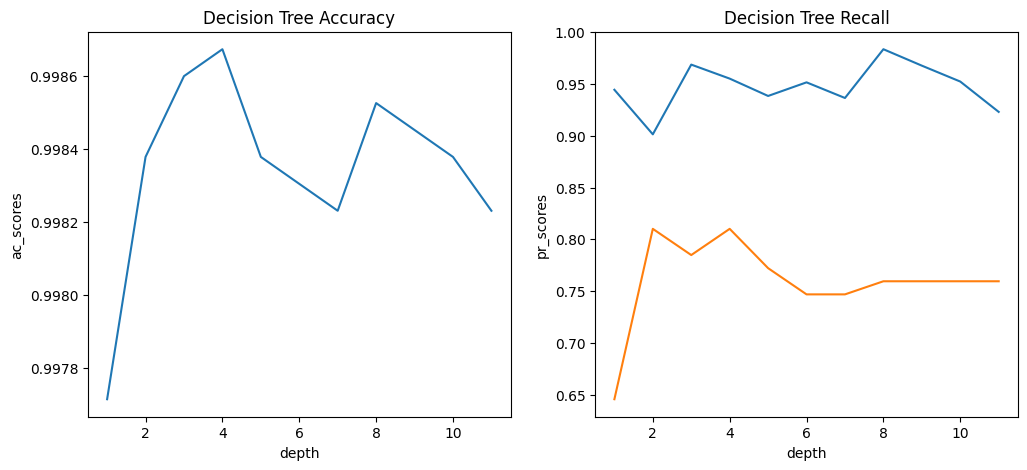

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(data=dtree_res,x='depth',y='ac_scores', ax=ax1).set_title('Decision Tree Accuracy')
sns.lineplot(data=dtree_res,x='depth',y='pr_scores', ax=ax2).set_title('Decision Tree Precision')
sns.lineplot(data=dtree_res,x='depth',y='recall_scores', ax=ax2).set_title('Decision Tree Recall')
plt.show()

In [43]:
dtree_res.nlargest(5, 'ac_scores')

,depth,ac_scores,pr_scores,recall_scores
3,4,0.998673,0.955224,0.810127
2,3,0.998600,0.968750,0.784810
7,8,0.998526,0.983607,0.759494
8,9,0.998452,0.967742,0.759494
1,2,0.998379,0.901408,0.810127


In [44]:
dtree_res.nlargest(5, 'pr_scores')

,depth,ac_scores,pr_scores,recall_scores
7,8,0.998526,0.983607,0.759494
2,3,0.998600,0.968750,0.784810
8,9,0.998452,0.967742,0.759494
3,4,0.998673,0.955224,0.810127
9,10,0.998379,0.952381,0.759494


In [45]:
dtree_res.nlargest(5, 'recall_scores')

,depth,ac_scores,pr_scores,recall_scores
1,2,0.998379,0.901408,0.810127
3,4,0.998673,0.955224,0.810127
2,3,0.998600,0.968750,0.784810
4,5,0.998379,0.938462,0.772152
7,8,0.998526,0.983607,0.759494


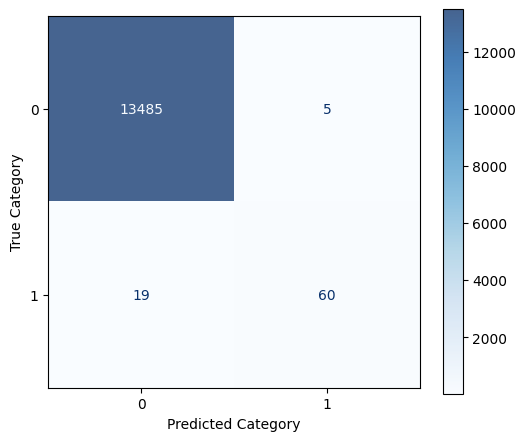

In [46]:
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    ax=ax,
    im_kw={"cmap": "Blues", "alpha": 0.75}
)
ax.set_xlabel("Predicted Category")
ax.set_ylabel("True Category")
ax.grid(False)
plt.show()

In [59]:
#best model
best_mod = make_pipeline(
        preprocessor,
        DecisionTreeClassifier(max_depth= 4, random_state=42)
)
best_mod.fit(X_train, y_train)
y_pred_best = best_mod.predict(X_test)
best_mod_ac = accuracy_score(y_test, y_pred_best)
best_mod_pr = precision_score(y_test, y_pred_best)
best_mod_recall = recall_score(y_test, y_pred_best)

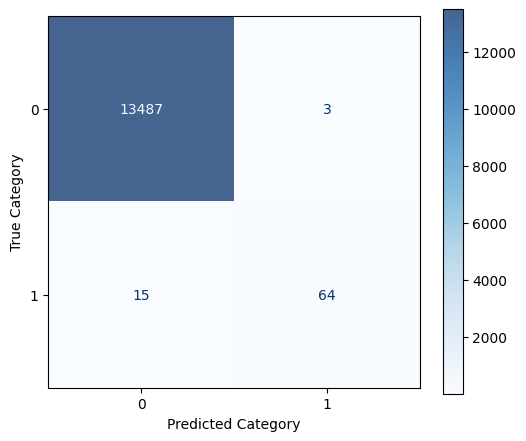

In [60]:
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_best,
    ax=ax,
    im_kw={"cmap": "Blues", "alpha": 0.75}
)
ax.set_xlabel("Predicted Category")
ax.set_ylabel("True Category")
ax.grid(False)
plt.show()

In [61]:
print("Decision Tree Model with Max-Depth = 4")
print("Accuracy Score: " + str(best_mod_ac))
print("Precision Score: " + str(best_mod_pr))
print("Recall Score: " + str(best_mod_recall))

Decision Tree Model with Max-Depth = 4
Accuracy Score: 0.998673446827327
Precision Score: 0.9552238805970149
Recall Score: 0.810126582278481
